In [1]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [2]:
# spread_sheet_link = "https://docs.google.com/spreadsheets/d/1GBLDlhzC-gq9w1TuqaKfL3WJqRP_lbnK--te1QOz6Jk/edit?usp=sharing"
# the sheet link :- "1GBLDlhzC-gq9w1TuqaKfL3WJqRP_lbnK--te1QOz6Jk"

In [3]:
import gspread

# Using "API key"
api_key = "YOUR-API-KEY"
gc = gspread.api_key(api_key)

'''

# Using "Service Account Credentials"
from google.oauth2.service_account import Credentials

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file(
    'gen-lang-client-0763216967-b7dae8c274af.json',    # upload json file id using the service account from the google console
    scopes=scopes
)

gc = gspread.authorize(credentials)
'''

# Can use any one of "API_KEY" or "Service Account Credentials" from the google cloud.
sh = gc.open_by_key("1GBLDlhzC-gq9w1TuqaKfL3WJqRP_lbnK--te1QOz6Jk")


In [4]:
# prompt: read sheets from sh
import pandas as pd

worksheet = sh.sheet1 # or sh.get_worksheet(0) for the first sheet

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df_sheets = pd.DataFrame(data[1:], columns=data[0])  # First row is header

df_sheets

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9974052734733,Immediate Assistance Requested,"Dear Customer Support Team,\n\nI am contacting...",Subject: Re: Immediate Assistance Requested\n\...,Request,Technical Support,high,en,IT Consulting Firm,IT Support,Urgent Issue,Network Issue,Problem Resolution,Technical Guidance,Service Recovery,Performance Tuning,,
1562,9976062913094,Demande de consultation de serveur,"Cher support client,\n\nJe vous écris pour dem...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Customer Service,medium,fr,IT Services,IT Support,Technical Support,System Maintenance,Software Bug,Technical Guidance,,,,
1563,9980051846510,Solicitação de Troca de Impressora,"Caro Suporte da Loja Online Tech,\n\nEstou enf...","Caro <name>,\n\nObrigado por entrar em contato...",Request,Returns and Exchanges,medium,pt,Tech Online Store,Returns and Exchanges,Product Support,Warranty Claim,Order Issue,Service Recovery,,,,
1564,9982406203212,Problèmes de facturation concernant les servic...,"Cher Service Client,\n\nJe vous écris pour por...","Cher <name>,\n\nMerci de nous avoir contactés ...",Problem,Billing and Payments,high,fr,IT Services,Billing Issue,Customer Service,Account Assistance,Problem Resolution,,,,,


In [5]:
df_english = df_sheets.loc[df_sheets["language"].eq("en"), :]
df_english.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,


In [6]:
tickets = df_english.loc[:, ["subject", "body"]].apply(lambda x: f"Subject: {x['subject']} \n\n Body: {x['body']}", axis=1)

In [7]:
print(tickets[0])

Subject: Urgent: Critical impact on enterprise network connectivity 

 Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>


In [8]:
print(tickets)

0       Subject: Urgent: Critical impact on enterprise...
1       Subject: Intermittent Cursor Freezing Issue on...
5       Subject: Exchange Request for Malfunctioning D...
6       Subject: Request for Server Administration Ass...
7       Subject: Immediate Attention Required: AWS Out...
                              ...                        
1517    Subject: AWS Authentication Issues \n\n Body: ...
1528    Subject: Immediate Assistance Needed: Issues w...
1536    Subject: High Priority: Recurring Network Disr...
1537    Subject: Request for Support \n\n Body: I woul...
1561    Subject: Immediate Assistance Requested \n\n B...
Length: 339, dtype: object


In [9]:
# prompt: from tickets remove stop words, lemmatize it and use tfidf vectorizer

import pandas as pd
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stop_words.remove("don't")
stop_words.remove("no")
stop_words.remove("not")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return " ".join(tokens)


preprocessed_tickets = tickets.apply(preprocess_text)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_tickets)

tfidf_matrix

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<339x2120 sparse matrix of type '<class 'numpy.float64'>'
	with 21047 stored elements in Compressed Sparse Row format>

In [10]:
print(stop_words)

{'didn', 'can', 'they', 'up', 'who', 'ourselves', "you've", 'was', 'now', 'm', 'her', 'wasn', "hadn't", 't', 'ain', 'such', 'll', "won't", 'any', 'same', 'him', 'me', 'further', 'all', 'why', 'does', 'between', 'below', 'should', 'through', 'until', 'our', 'have', 'are', 'from', 'hasn', 'you', 'having', 'being', 'for', 'once', 'doesn', "couldn't", "you'll", 've', 'these', "you'd", 'nor', "should've", 'of', 'own', "wouldn't", 'needn', 'themselves', 'his', 'will', 'as', 'o', "shan't", 'other', 'when', 'wouldn', 'before', 'at', 'it', 'over', 'ours', 'them', 'down', 'few', 'while', 'only', "weren't", 'do', 'were', 'my', 'out', "doesn't", 'your', 'we', 'weren', 'itself', 'into', 'isn', 'i', 'there', "mightn't", 'haven', 'he', 'mustn', 'theirs', 'that', 'yourself', 'about', 'what', 'mightn', 'its', 'to', 'myself', 'where', 'too', 'above', "mustn't", 'or', 'and', 'hadn', "shouldn't", "it's", 'here', 'this', 'has', 'be', 'more', 'again', 'am', 'during', 'an', 'off', 'been', 'whom', 's', 'on', 

In [11]:
tfidf_matrix.shape

(339, 2120)

In [12]:
# prompt: use pca to get top 3 pca of TDFIF_Matrix

import pandas as pd
from sklearn.decomposition import PCA

# Assuming tfidf_matrix is already defined from the previous code

# Apply PCA to reduce dimensionality to top 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray()) # Convert sparse matrix to dense array

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Print the first few rows of the PCA DataFrame
print(pca_df.head())

# You can now use pca_df for further analysis or visualization.
# For example, to see the explained variance ratio:
pca.explained_variance_ratio_

        PC1       PC2       PC3
0 -0.121941  0.348388  0.007853
1 -0.151584 -0.064211 -0.015741
2 -0.161874 -0.256981 -0.022144
3  0.098798 -0.015106 -0.258295
4  0.214851  0.112639 -0.006260


array([0.03298786, 0.02796689, 0.02200402])

In [13]:
# prompt: combine and tokenize all tags columns (tag_1 to tag_9) and sort tokens an make a string unique tokens

def combine_and_tokenize_tags(df):
    """Combines and tokenizes tag columns, sorts tokens, and creates a unique string.

    Args:
        df: DataFrame with tag columns (tag_1 to tag_9).

    Returns:
        A pandas Series with unique token strings.
    """

    def process_tags(row):
        combined_tags = ""
        for i in range(1, 10):  # Assuming tags from tag_1 to tag_9
            tag_col = f"tag_{i}"
            if tag_col in row and pd.notna(row[tag_col]):
                combined_tags += str(row[tag_col]) + " "

        tokens = nltk.word_tokenize(combined_tags.lower())
        unique_tokens = sorted(list(set(tokens))) #Tokenize, make unique and sort
        return " ".join(unique_tokens)

    return df.apply(process_tags, axis=1)

# Example usage (assuming your DataFrame is named df_english):
#df_english['combined_unique_tags'] = combine_and_tokenize_tags(df_english)
#print(df_english['combined_unique_tags'])

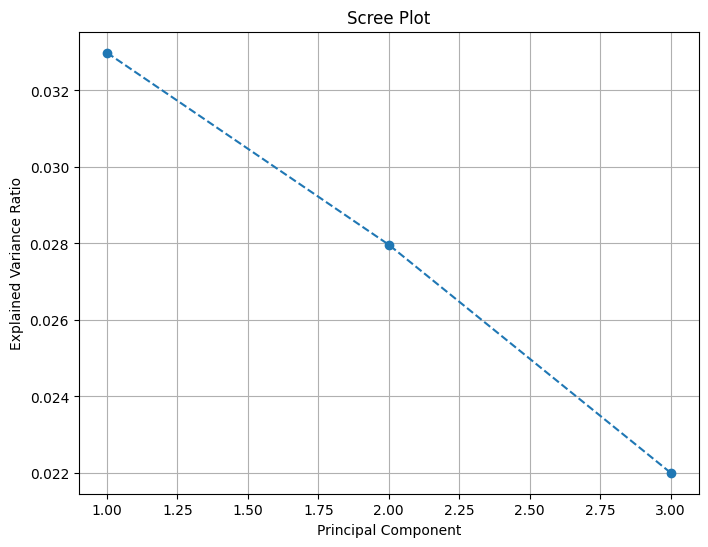

array([0.03298786, 0.02796689, 0.02200402])

In [14]:
# prompt: pca_df variance eplxained and draw a scree plot

import matplotlib.pyplot as plt

# Assuming pca_df and pca are already defined from the previous code

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

explained_variance

In [15]:
# prompt: combine and tokenize all tags columns (tag_1 to tag_9) and sort tokens an make a string unique tokens and create a new column "tags_combined"

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ... (rest of your existing code)


def combine_and_tokenize_tags(df):
    """Combines and tokenizes tag columns, sorts tokens, and creates a unique string.

    Args:
        df: DataFrame with tag columns (tag_1 to tag_9).

    Returns:
        A pandas Series with unique token strings.
    """
    def process_tags(row):
        combined_tags = ""
        for i in range(1, 10):  # Assuming tags from tag_1 to tag_9
            tag_col = f"tag_{i}"
            if tag_col in row and pd.notna(row[tag_col]) and row[tag_col] != '': #Check for empty strings
                combined_tags += str(row[tag_col]) + " "

        if not combined_tags: # Handle cases where all tag columns are empty
          return ""

        tokens = nltk.word_tokenize(combined_tags.lower())
        unique_tokens = sorted(list(set(tokens)))
        return " ".join(unique_tokens)

    return df.apply(process_tags, axis=1)

# Example usage (assuming your DataFrame is named df_english):
df_english['tags_combined'] = combine_and_tokenize_tags(df_english)
print(df_english['tags_combined'])

0       crash critical disruption failure issue networ...
1       documentation failure hardware issue problem p...
5       and customer exchanges issue order product rep...
6       guidance it performance problem recovery resol...
7       customer incident issue it maintenance outage ...
                              ...                        
1517    account disruption issue it problem resolution...
1528    crash disruption issue it problem resolution s...
1536    disruption guidance issue network problem reso...
1537    general inquiry problem product resolution sup...
1561    guidance issue it network performance problem ...
Name: tags_combined, Length: 339, dtype: object


<ipython-input-15-a10c3885d6a7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['tags_combined'] = combine_and_tokenize_tags(df_english)


In [16]:
df_english.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tags_combined
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,,crash critical disruption failure issue networ...
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,,documentation failure hardware issue problem p...
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,,and customer exchanges issue order product rep...
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,,guidance it performance problem recovery resol...
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,,customer incident issue it maintenance outage ...


In [17]:
# prompt: use plotly 3D plot to plot top 3 pcas

import plotly.express as px

# Assuming pca_df is already defined from the previous code

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    title='Top 3 Principal Components', color=df_english.index)
fig.show()

In [18]:
import plotly.express as px

# Assuming pca_df and df_en are already defined from the previous code

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_english['tags_combined'])
fig.show()

In [19]:
df_english.loc[[980, 817, 293, 433, 43, 633], ["subject", "body", "answer"]].values

array([['Urgent Issue with AWS Deployment',
        'Dear IT Services Support Team, I am writing to inform you of a critical issue we are experiencing with our AWS infrastructure deployment, which is significantly affecting our cloud service operational efficiency and cost optimization efforts. The problem seems related to the AWS Management Service, causing disruptions in our regular business operations. We urgently require your assistance to rectify this issue. Please escalate this as a high-priority incident and advise on the next possible steps. Attached are relevant logs and performance data for your reference. Looking forward to your swift response. Thank you, <name>.',
        'Dear <name>,\n\nThank you for reaching out to us regarding the issue with your AWS deployment. We understand the urgency of the situation and have escalated this as a high-priority incident as per your request.\n\nOur team is currently reviewing the logs and performance data you provided to diagnose the p

In [20]:
df_english.loc[[194, 626, 536, 906, 53, 931], ["subject", "answer"]].values

array([['Assistance Needed for Printer Setup',
        'Dear <name>,\n\nThank you for reaching out to us regarding your Canon PIXMA MG3620 printer Wi-Fi setup. I\'m here to assist you. Please ensure that your wireless router is on, and place your printer within range without any obstructions. If possible, restart both your router and printer. Next, check that your printer is in "Wireless" mode and attempt the Wi-Fi setup process again following these steps:\n\n1. Press the Wi-Fi button on the printer until the ON light flashes. \n2. Go to your device\'s Wi-Fi settings and add the printer by selecting its network.\n3. Use the "Standard" or "Easy" method as suggested in your printer application or guide provided in the manual.\n\nIf you continue to experience issues, please reply with any error messages displayed. We are here to help. \n\nBest regards,\nTech Online Store Support Team'],
       ['Help Needed: Printer Connection Problem',
        'Hi <name>,\n\nWe appreciate you contacting

In [21]:
df_english.loc[[302, 117, 845], ["subject", "answer"]].values

array([['Cisco Router Outage',
        'Dear <name>,\n\nThank you for reaching out and informing us about the critical issue with the Cisco Router ISR4331. We understand the urgency and impact this outage is having on your services and clients. \n\nOur technical team is prioritizing your case and will be coordinating with you shortly to address the suspected hardware or firmware fault. We recommend preparing any relevant logs or data that could assist in a swift diagnosis and resolution.\n\nPlease expect a senior technical team member to reach out within the hour to begin resolving this issue. We aim to restore full functionality and will keep you updated throughout the process.\n\nThank you for your patience and trust in our services. We are committed to resolving this matter with the utmost urgency.\n\nBest regards,\n\n[Your Name]\nCustomer Support Team'],
       ['Intermittent Network Connectivity Issues',
        "Subject: Re: Intermittent Network Connectivity Issues\n\nDear <name>

In [22]:
# prompt: get 3d tsne of tfidf_matrix.toarray() and plot a 3d plotly express graph

import plotly.express as px
from sklearn.manifold import TSNE

# Assuming tfidf_matrix is already defined from the previous code

tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3',
                    title='3D t-SNE Visualization of TF-IDF Matrix', color=df_english['tags_combined'])
fig.show()

In [23]:
df_english.index

Index([   0,    1,    5,    6,    7,    8,   11,   13,   18,   20,
       ...
       1435, 1440, 1447, 1498, 1512, 1517, 1528, 1536, 1537, 1561],
      dtype='int64', length=339)

In [24]:
df_english.loc[[168, 327, 332], :]["answer"].values

array(['Subject: Re: Support Request for Cisco Router ISR4331  \n\nDear <name>,  \n\nThank you for reaching out to us. We understand the issues you are facing with your Cisco Router ISR4331 due to frequent connection drops. To resolve this, we recommend checking for the latest firmware update for your device. Please visit the official Cisco website to download and install the newest firmware version. If the problem persists after the update, please ensure that all cables are properly connected and consider a hardware reset for the router. For personalized assistance, please contact us with your usual details.  \n\nBest regards,  \nIT Services Support Team',
       "Subject: Re: Urgent: Frequent Network Drops Issue\n\nDear <name>,\n\nThank you for reaching out. We understand how critical this issue is for your operations. Please try restarting your Cisco Router ISR4331 and check for any loose connections or visible hardware issues. Ensure the firmware is up-to-date and configurations ma

In [25]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [26]:
def get_all_pos_tags(row):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    return tokens

def get_all_ner(row):
    doc = nlp(row)

    return [(ent.text, ent.label_) for ent in doc.ents]

In [27]:
def get_all_nouns_after(row, after=["with"]):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    final_nouns = []
    curr_noun = ""
    with_occured = False
    for el in tokens:
        if el[0] in after:
            with_occured = True
        elif el[1] not in ["NOUN", "PROPN"]:
            with_occured = False

        if el[1] in ["NOUN", "PROPN"] and with_occured:
            curr_noun += " " + el[0]
        else:
            if curr_noun != "":
                final_nouns.append(curr_noun.strip())
                curr_noun = ""

    if curr_noun != "":
        final_nouns.append(curr_noun.strip())

    return final_nouns

df_english["nouns"] = df_english["subject"].apply(get_all_nouns_after)

<ipython-input-27-7979d635480f>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df_english.loc[df_en["nouns"].map(len) > 0, "nouns"].shape[0] / df_english.shape[0] * 100

NameError: name 'df_en' is not defined

In [30]:
df_english.loc[df_english["nouns"].map(len) > 0, "nouns"]

,nouns
18,[AWS Resource Optimization]
26,[AWS Deployment]
49,[Dell XPS]
53,[Canon PIXMA MG3620 Printer]
72,[AWS Management Service Deployment]
74,[Cisco Router]
95,[HP DeskJet]
107,[AWS Management Service]
127,[Surface Pro]
129,[Dell XPS]


In [31]:
df_english["nouns_body"] = df_english["body"].apply(get_all_nouns_after)

<ipython-input-31-ffee93051b0f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
import numpy as np
pd.Series(np.concatenate([df_english.loc[df_english["nouns_body"].map(len) > 0, "nouns_body"].index.values, df_english.loc[df_english["nouns"].map(len) > 0, "nouns"].index.values])).value_counts()

,count
613,2
892,2
18,2
1528,2
775,2
...,...
644,1
626,1
623,1
596,1


In [33]:
df_english["pos_tags"] = df_english["answer"].map(get_all_pos_tags)

<ipython-input-33-0c28769ecefe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_english.loc[:, ["pos_tags", "answer"]].sample(n=3).values

array([[list([('Dear', 'ADJ'), ('<', 'X'), ('name', 'NOUN'), ('>', 'X'), (',', 'PUNCT'), ('\n\n', 'SPACE'), ('Thank', 'VERB'), ('you', 'PRON'), ('for', 'ADP'), ('your', 'PRON'), ('interest', 'NOUN'), ('in', 'ADP'), ('our', 'PRON'), ('JavaScript', 'PROPN'), ('React', 'PROPN'), ('App', 'PROPN'), ('Development', 'PROPN'), ('Service', 'PROPN'), ('.', 'PUNCT'), ('We', 'PRON'), ('offer', 'VERB'), ('a', 'DET'), ('range', 'NOUN'), ('of', 'ADP'), ('features', 'NOUN'), ('including', 'VERB'), ('custom', 'NOUN'), ('component', 'NOUN'), ('development', 'NOUN'), (',', 'PUNCT'), ('dynamic', 'ADJ'), ('UI', 'PROPN'), ('/', 'SYM'), ('UX', 'PROPN'), ('design', 'NOUN'), (',', 'PUNCT'), ('state', 'NOUN'), ('management', 'NOUN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('API', 'NOUN'), ('integration', 'NOUN'), ('.', 'PUNCT'), ('Pricing', 'NOUN'), ('options', 'NOUN'), ('vary', 'VERB'), ('depending', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('scope', 'NOUN'), ('and', 'CCONJ'), ('specific', 'ADJ'), ('requirements', '

In [35]:
df_english["ner_tags"] = df_english["answer"].map(get_all_ner)

<ipython-input-35-32b20222b24c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_english.loc[:, ["ner_tags", "answer"]].sample(n=3).values

array([[list([('AWS Management Service', 'ORG')]),
        'Subject: Re: Request for Optimization of AWS Cloud Resources and Stability\n\nDear <name>,\n\nThank you for reaching out about the issues with your AWS Management Service. We understand the importance of efficient and stable cloud resources. Our team will review your account <acc_num> promptly to identify opportunities for optimization and cost reduction. In the meantime, you may want to check settings like auto-scaling policies, reserved instances, and unused resources to ensure alignment with your needs.\n\nWe will contact you with recommendations soon. If you need immediate assistance or more information, feel free to reply to this email or reach out via <tel_num>.\n\nBest regards,\nIT Services Customer Support Team'],
       [list([]),
        'Dear <name>,\n\nThank you for bringing the issues with your ticket system to our attention. We understand the urgency and impact it has on your operations. Our technical support tea

In [37]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [38]:
df_english["ner_tags_bert_large"] = df_english["subject"].map(lambda x: nlp(x))

<ipython-input-38-769f2c42e9c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df_english.loc[:, ["ner_tags_bert_large", "subject"]].sample(n=10).values

array([[list([]), 'Urgent: Immediate IT Assistance Needed'],
       [list([]), 'Immediate Help Required for Server Outage Situation'],
       [list([{'entity': 'B-ORG', 'score': 0.99113387, 'index': 1, 'word': 'Dell', 'start': 0, 'end': 4}, {'entity': 'I-ORG', 'score': 0.867195, 'index': 2, 'word': 'X', 'start': 5, 'end': 6}, {'entity': 'I-ORG', 'score': 0.8505149, 'index': 3, 'word': '##PS', 'start': 6, 'end': 8}]),
        'Dell XPS 13 Overheating Issue'],
       [list([{'entity': 'B-MISC', 'score': 0.9214237, 'index': 3, 'word': 'Adobe', 'start': 16, 'end': 21}, {'entity': 'I-MISC', 'score': 0.71493757, 'index': 4, 'word': 'Photo', 'start': 22, 'end': 27}, {'entity': 'I-MISC', 'score': 0.5973486, 'index': 5, 'word': '##sh', 'start': 27, 'end': 29}, {'entity': 'I-MISC', 'score': 0.5974217, 'index': 6, 'word': '##op', 'start': 29, 'end': 31}]),
        'Assistance with Adobe Photoshop'],
       [list([{'entity': 'B-MISC', 'score': 0.9985114, 'index': 3, 'word': 'Surface', 'start': 11,

In [40]:
df_english["products_ner_bert_large"] = df_english["ner_tags_bert_large"].map(lambda x: " ".join([el["word"] for el in x]).replace(" ##", ""))

<ipython-input-40-fc5fc97643f9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
(df_english["products_ner_bert_large"].map(lambda x: len(x) > 0 if type(x) == str else False) > 0).sum()

200

In [42]:
df_english.loc[df_english["products_ner_bert_large"].map(len) > 0, ["products_ner_bert_large", "subject"]].sample(n=10)

,products_ner_bert_large,subject
390,AWS,Immediate AWS Assistance
1340,AWS Management Service,Billing Issue with AWS Management Service
310,Epson EcoTk,Inquiry About Epson EcoTank ET-4760 Printer
153,Amazon Navigation,Assistance Required for Amazon Navigation
791,AWS,Intermittent Connectivity Issues with AWS
472,Route,Urgent: Critical Network Issue with Router ISR...
469,MacBook Air,MacBook Air Issue
367,Cisco Router,Network Outage Due to Cisco Router ISR4331 Fai...
879,AWS,Urgent Request for AWS Infrastructure Optimiza...
872,AWS,Request for AWS Infrastructure Scaling Assistance


In [43]:
160 / df_english.shape[0] * 100

47.1976401179941